### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [422]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [423]:
#read the files into dataframes
ratings = pd.read_csv('Data.csv')
movies = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

In [424]:
#read first 5 rows of ratings data
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [425]:
#read first 5 rows of movies dataset
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [426]:
#read first 5 rows of users dataset
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [427]:
#get information about ratings data set
ratings.info() #All data types are integer in the ratings dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [428]:
#get information about movies data set
movies.info() #only 2 columns are object data types and rest are integer data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [429]:
#get information about users data set
users.info() #2 data types are integer and rest are object types in users dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [430]:
ratings.shape #100000 rows and 4 columns

(100000, 4)

In [431]:
movies.shape #1681 rows and 22 columns

(1681, 22)

In [432]:
users.shape #943 rows and 5 columns

(943, 5)

In [433]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [434]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [435]:
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [436]:
pd.DataFrame(ratings.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [437]:
pd.DataFrame(movies.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [438]:
pd.DataFrame(users.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [439]:
genres = movies.drop(['movie id','movie title','release date'], axis=1)
genres.sum().sort_values(ascending=False)
#count of movies by genre sorted by most to least

Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [440]:
movies.drop(movies[movies['unknown'] == 1].index, inplace = True)

In [441]:
genres = movies.drop(['movie id','movie title','release date'], axis=1)
genres.sum().sort_values(ascending=True)
#unknown genre count is 0 now

unknown          0
Fantasy         22
Film-Noir       24
Western         27
Animation       42
Documentary     50
Musical         56
Mystery         61
War             71
Horror          92
Sci-Fi         101
Crime          109
Childrens      122
Adventure      135
Romance        247
Action         251
Thriller       251
Comedy         505
Drama          725
dtype: int64

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [470]:
moviet = movies[['movie title', 'Action' ,  'Adventure' ,  'Animation' ,  'Childrens' ,  'Comedy' ,  'Crime' ,  'Documentary' ,  'Drama' ,  'Fantasy' ,  'Film-Noir' ,  'Horror' ,  'Musical' ,  'Mystery' ,  'Romance' ,  'Sci-Fi' ,  'Thriller' ,  'War' ,  'Western' ]]
moviet
moviet['total_genre'] = moviet.iloc[:, -18:-1].sum(axis=1)
moviet = moviet[['movie title', 'total_genre']]
moviet.sort_values(by=['total_genre'], ascending=False)

#movie titles and with total number of genres sorted by most to least genres

<ipython-input-470-c77cedf80d09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviet['total_genre'] = moviet.iloc[:, -18:-1].sum(axis=1)


,movie title,total_genre
558,"Kid in King Arthur's Court, A",6
424,"Transformers: The Movie, The",6
171,"Empire Strikes Back, The",6
1074,"Pagemaster, The",5
753,Jumanji,5
...,...,...
1585,Terror in a Texas Town,0
1453,"Outlaw, The",0
1452,Angel and the Badman,0
644,Once Upon a Time in the West,0


In [472]:
print(moviet[moviet['total_genre'] > 1].sort_values(by=['total_genre'], ascending=False))
# there are 845 movie titles which have more than 1 genre

                         movie title  total_genre
171        Empire Strikes Back, The             6
558   Kid in King Arthur's Court, A             6
424    Transformers: The Movie, The             6
183                Army of Darkness             5
100                     Heavy Metal             5
...                              ...          ...
693           Kicking and Screaming             2
694                       City Hall             2
700                       Barcelona             2
702       House of the Spirits, The             2
1678                  Sliding Doors             2

[845 rows x 2 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [444]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


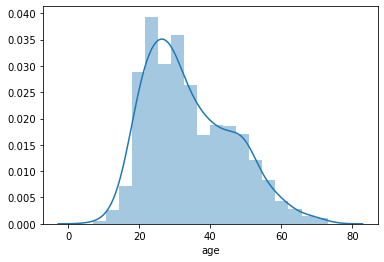

In [445]:
sns.distplot(users['age'])

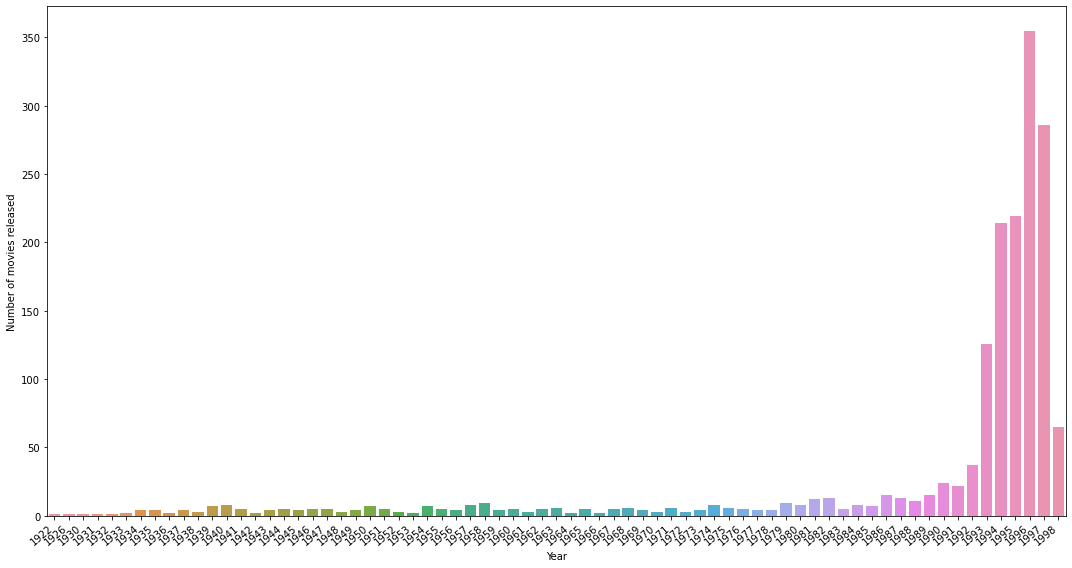

In [446]:
movies['release date'] = pd.to_datetime(movies['release date'])
movies['release year'] = pd.DatetimeIndex(movies['release date']).year
plt.figure(figsize=(15,8))
ax = sns.countplot(x=movies['release year'], data=movies['release year'], linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Year")
plt.ylabel("Number of movies released")
plt.tight_layout()
plt.show()

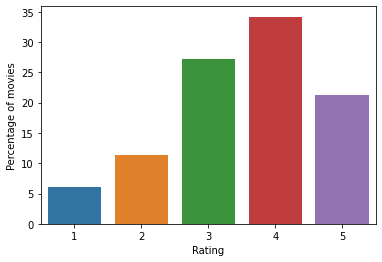

In [447]:
#Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation
#calculate percentage of ratings
per_ratings=pd.DataFrame(ratings['rating'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='rating', data=per_ratings)
plt.xlabel("Rating")
plt.ylabel("Percentage of movies")
plt.show()

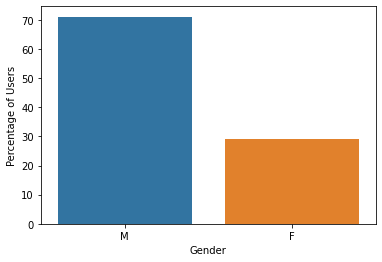

In [448]:
#Calculate % of gender
per_gender=pd.DataFrame(users['gender'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='gender', data=per_gender)
plt.xlabel("Gender")
plt.ylabel("Percentage of Users")
plt.show()

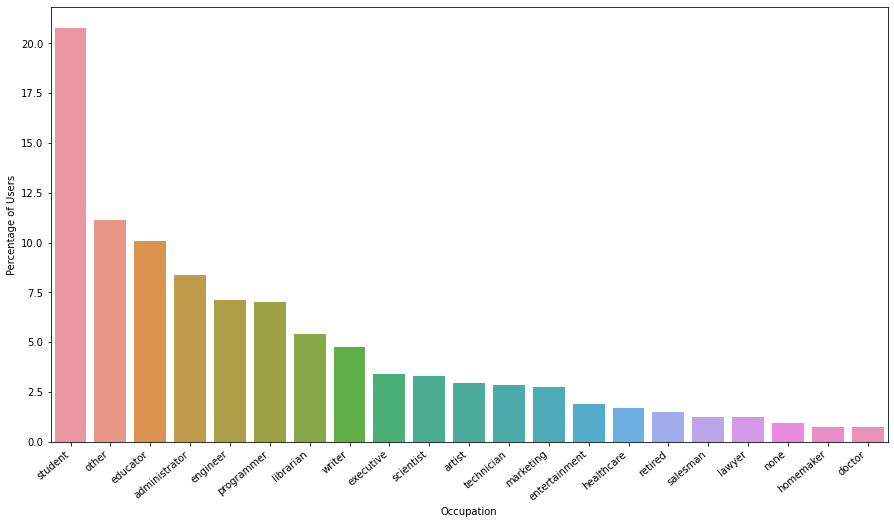

In [449]:
#Calculate % of occupation
per_occupation=pd.DataFrame(users['occupation'].value_counts(normalize=True)*100).reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='occupation', data=per_occupation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Occupation")
plt.ylabel("Percentage of Users")
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

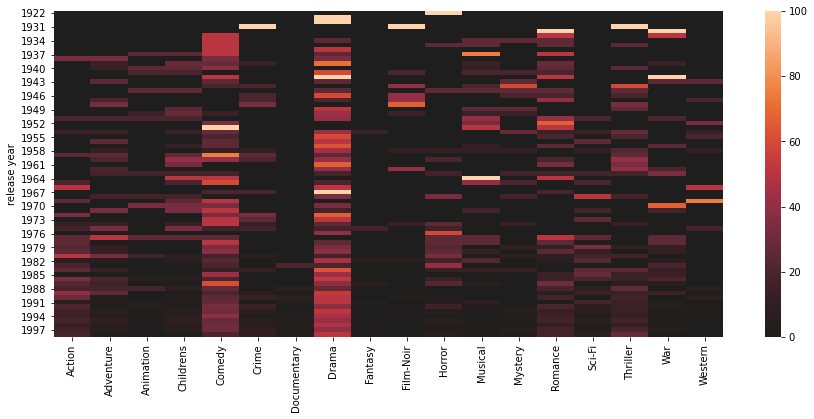

In [450]:
popt = movies.drop(['movie id','movie title', 'release date'], axis=1)
#popt['countby'] = 1
pop1=popt.groupby('release year').agg({ 'release year': 'count', 'Action' : 'sum' ,  'Adventure' : 'sum' ,  'Animation' : 'sum' ,  'Childrens' : 'sum' ,  'Comedy' : 'sum' ,  'Crime' : 'sum' ,  'Documentary' : 'sum' ,  'Drama' : 'sum' ,  'Fantasy' : 'sum' ,  'Film-Noir' : 'sum' ,  'Horror' : 'sum' ,  'Musical' : 'sum' ,  'Mystery' : 'sum' ,  'Romance' : 'sum' ,  'Sci-Fi' : 'sum' ,  'Thriller' : 'sum' ,  'War' : 'sum' ,  'Western' : 'sum' })
pop1
pop1 = pop1.div(pop1['release year'],axis=0)*100
pop1 = pop1.drop(['release year'], axis=1)
plt.figure(figsize=(15,6))
ax = sns.heatmap(pop1, center = 0, fmt="d")
# Popularity of Drama, Comedy was always there did not see much change. 
# Popularity of Action, Horror, Scifi increased over time. 
# Polularity of Romance, Musical are modulated i.e. they go up and down
#Popularity of Documentary and Fantasy movies did not change much and are not very popular genres

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [451]:
ratingcal = ratings
ratingcal = ratings.drop(['user id','timestamp'], axis=1)
ratingcal
ratingcal1 = ratingcal.groupby(['movie id']).agg({'rating' : ['count', 'mean']})
ratingcal1 = ratingcal1[ratingcal1['rating', 'count'] > 100]
moviename = movies[['movie id', 'movie title']]
ratingcal1 = ratingcal1.merge(moviename, left_on='movie id', right_on='movie id')
ratingcal1 = ratingcal1.sort_values(by =[('rating', 'mean'), ('rating', 'count')], ascending=False)
ratingcal1 = ratingcal1.head(25)
ratingcal1

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,movie id,"(rating, count)","(rating, mean)",movie title
231,408,112,4.491071,"Close Shave, A"
202,318,298,4.466443,Schindler's List
91,169,118,4.466102,"Wrong Trousers, The"
261,483,243,4.456790,Casablanca
29,64,283,4.445230,"Shawshank Redemption, The"
292,603,209,4.387560,Rear Window
7,12,267,4.385768,"Usual Suspects, The"
22,50,583,4.358491,Star Wars
99,178,125,4.344000,12 Angry Men
72,134,198,4.292929,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [479]:
md_movielens = ratings.merge(movies).merge(users)
md_movielens

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,release year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,1997-01-24,0,0,0,0,...,0,0,0,0,0,1997,49,M,writer,55105
1,196,257,2,881251577,Men in Black,1997-07-04,0,1,1,0,...,0,1,0,0,0,1997,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",1996-04-26,0,0,0,0,...,1,0,0,0,0,1996,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",1996-03-08,0,0,0,0,...,0,0,0,0,0,1996,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1994-01-01,0,0,0,0,...,0,0,0,0,0,1994,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,873,313,5,891392177,Titanic,1997-01-01,0,1,0,0,...,1,0,0,0,0,1997,48,F,administrator,33763
99986,873,326,4,891392656,G.I. Jane,1997-01-01,0,1,0,0,...,0,0,0,1,0,1997,48,F,administrator,33763
99987,873,348,3,891392577,Desperate Measures,1998-01-30,0,0,0,0,...,0,0,1,0,0,1998,48,F,administrator,33763
99988,873,358,2,891392698,Spawn,1997-08-01,0,1,1,0,...,0,1,1,0,0,1997,48,F,administrator,33763


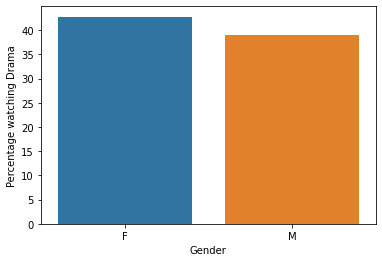

In [561]:
#Men watch more drama than women

total_rating = md_movielens.groupby('gender').count()
total_rating_drama = md_movielens.groupby(['gender', 'Drama']).count()
total_rating_drama = total_rating_drama[total_rating_drama.index.get_level_values('Drama')==1]
total_drama = total_rating_drama.div(total_rating)*100
total_drama = total_drama[['rating']].reset_index('gender')
sns.barplot(x='gender', y='rating', data=total_drama)
plt.xlabel("Gender")
plt.ylabel("Percentage watching Drama")
plt.show()
#Based on the below graph it can be concluded that the women watch drama more than men, so the hypothesis is incorrect

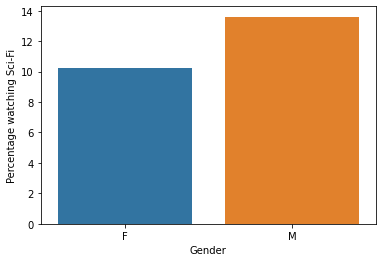

In [563]:
#Women watch more Sci-Fi than men

total_rating_drama = md_movielens.groupby(['gender', 'Sci-Fi']).count()
total_rating_drama = total_rating_drama[total_rating_drama.index.get_level_values('Sci-Fi')==1]
total_drama = total_rating_drama.div(total_rating)*100
total_drama = total_drama[['rating']].reset_index('gender')
sns.barplot(x='gender', y='rating', data=total_drama)
plt.xlabel("Gender")
plt.ylabel("Percentage watching Sci-Fi")
plt.show()
#Based on below graph men watch sci-fi more than women. The hypothesis is incorrect. 

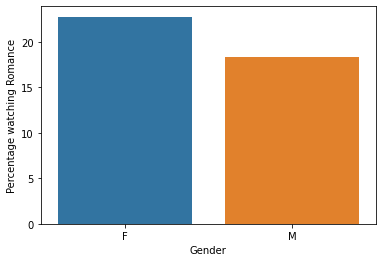

In [565]:
#Men watch more Romance than women
total_rating_drama = md_movielens.groupby(['gender', 'Romance']).count()
total_rating_drama = total_rating_drama[total_rating_drama.index.get_level_values('Romance')==1]
total_drama = total_rating_drama.div(total_rating)*100
total_drama = total_drama[['rating']].reset_index('gender')
sns.barplot(x='gender', y='rating', data=total_drama)
plt.xlabel("Gender")
plt.ylabel("Percentage watching Romance")
plt.show()
#Based on the plot below it can be concluded that women watch Romance more than men, the hypthesis is incorrect. 